In [1]:
import pandas as pd
import numpy as np

rn_state = 42 # random state for reproducibility

# Definición del problema

Pertenecemos a una compañía que se dedica a vender vino online.

Se quiere crear una página de recomendación de vinos para los clientes de la compañía.

Se nos ha dado información de los vinos actuales en la página y se nos pide crear un algoritmo para haer estas recomendaciones

https://www.kaggle.com/datasets/elvinrustam/wine-dataset/code

In [2]:
df_wine = pd.read_csv('WineDataset.csv')
df_wine.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


# Identificadores y variables intrabajables

Vemos qué variables no nos aportan información o no podemos usarlas.

In [3]:
len(df_wine['Title'].unique()) / len(df_wine['Title'])

0.9992248062015504

In [4]:
df_wine.drop_duplicates(subset=['Title'], keep='first', inplace=True)

In [5]:
df_wine.drop(['Title', 'Description'], axis=1, inplace=True)

Nos deshacemos de su nombre, puesto que no aporta información más allá de su identificación.

Nos deshacemos de la variable "description" puesto que aún no conocemos modelos que puedan interpretarlo.

# Numéricos

Empezamos analizando los datos numéricos: Price, Capacity, Vintage, ABV

In [6]:
pd.set_option("display.max_rows", None)

In [7]:
print(df_wine['Price'].value_counts(dropna=False))

Price
£11.99 per bottle     100
£14.99 per bottle      96
£9.99 per bottle       90
£13.99 per bottle      77
£16.99 per bottle      67
£12.99 per bottle      58
£15.99 per bottle      58
£19.99 per bottle      49
£17.99 per bottle      48
£29.99 per bottle      47
£8.99 per bottle       38
£22.99 per bottle      26
£24.99 per bottle      25
£39.99 per bottle      25
£7.99 per bottle       24
£18.99 per bottle      22
£10.99 per bottle      22
£49.99 per bottle      20
£26.99 per bottle      20
£21.99 per bottle      18
£34.99 per bottle      16
£25.99 per bottle      16
£27.99 per bottle      14
£32.99 per bottle      13
£37.99 per bottle      13
£6.99 per bottle       12
£69.99 per bottle      11
£23.99 per bottle      10
£42.99 per bottle      10
£59.99 per bottle       9
£44.99 per bottle       9
£36.99 per bottle       9
£55.99 per bottle       8
£20.99 per bottle       8
£33.99 per bottle       8
£11.29 per bottle       7
£64.99 per bottle       6
£79.99 per bottle       6
£5.99 

Vemos que no tenemos todos los precios por botella.

Pero tenemos otra columna que nos indica qué tipo de precio tenemos

In [8]:
df_wine['Per bottle / case / each'].value_counts(dropna=False)

Per bottle / case / each
per bottle    1278
per case         6
each             5
Name: count, dtype: int64

In [9]:
df_wine['Capacity'].value_counts(dropna=False)

Capacity
75CL      1192
37.5CL      23
750ML       18
1.5LTR      18
150CL       11
50CL         8
Our          6
2.25L        4
70CL         3
500ML        3
300CL        1
5LITRE       1
375ML        1
Name: count, dtype: int64

In [10]:
df_wine['Vintage'].value_counts(dropna=False)

Vintage
2022         318
2021         261
2020         194
NV           170
2019         101
2018          69
2017          45
2016          22
2015          19
2014          17
2023          12
2013          10
2012           9
NaN            7
2008           6
2010           5
2020/21        3
2011           3
2007           3
2021/22        2
2005           2
2021/2022      2
2002           1
2003           1
1999           1
2020/2021      1
2016/7         1
2012/2015      1
2020/2022      1
2019/20        1
2009           1
Name: count, dtype: int64

In [11]:
df_wine['ABV'].value_counts(dropna=False)

ABV
ABV 13.50%    249
ABV 13.00%    231
ABV 14.00%    188
ABV 14.50%    178
ABV 12.50%    174
ABV 12.00%    111
ABV 15.00%     45
ABV 11.00%     24
ABV 11.50%     16
ABV 20.00%     13
NaN             9
ABV 15.50%      8
ABV 16.00%      4
ABV 20.50%      4
ABV 9.50%       4
ABV 10.50%      3
ABV 0.50%       3
ABV 8.00%       3
ABV 14.40%      3
ABV 40.00%      2
ABV 19.00%      2
ABV 8.50%       2
ABV 10.00%      2
ABV 18.00%      1
ABV 14.20%      1
ABV 13.10%      1
ABV 17.50%      1
ABV 17.00%      1
ABV 18.50%      1
ABV 13.80%      1
ABV 5.00%       1
ABV 4.90%       1
ABV 12.90%      1
ABV 14.60%      1
Name: count, dtype: int64

vemos que todas las variables no aparecen como números así que tendremos que modificarlas, esto lo hacemos creando funciones y llamando a la función apply

## Transformación de variables numéricas

In [12]:
import re

def normalize_wine_vintage(row):
    vintage = row['Vintage']
    if (vintage == 'NV') or vintage is np.nan:
        return np.nan
    else:
        vintage = re.search(r'\d+', vintage)[0]
    return int(vintage)

In [13]:
df_wine['Vintage'] = df_wine.apply(normalize_wine_vintage, axis=1)
df_wine['Vintage'].fillna(df_wine['Vintage'].mean(), inplace=True)

In [14]:
def normalize_wine_price(row):
    price = row['Price']
    price = re.search(r'\d+\.\d*', price)[0]
    price = float(price)
    if 'case' in row['Per bottle / case / each']:
        price = price / 12
    return price

In [15]:
df_wine['Price'] = df_wine.apply(normalize_wine_price, axis=1)

In [16]:
def ABV_to_proportion(row):
    if not pd.isna(row['ABV']):
        abv = re.search(r'\d+.\d*', row['ABV'])[0]
        return float(abv)/100
    else:
        return None

In [17]:
df_wine['ABV'] = df_wine.apply(ABV_to_proportion, axis=1)
df_wine.dropna(inplace=True, subset=['ABV'])

In [18]:
def normalize_wine_capacity_to_cl(row):
    capacity = row['Capacity']
    if 'our' in capacity.lower():
        return np.nan
    capacity = re.search(r'\d+\.?\d*', capacity)[0]
    capacity = float(capacity)
    if 'ml' in row['Capacity'].lower():
        capacity = capacity / 10
    if 'l' in row['Capacity'].lower():
        capacity = capacity * 100
    return int(capacity)

In [19]:
df_wine['Capacity'] = df_wine.apply(normalize_wine_capacity_to_cl, axis=1)
df_wine['Capacity'].fillna(df_wine['Capacity'].mode()[0], inplace=True)
df_wine.head()

,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,7500,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,0.140,NaN,Rich & Juicy,2019.854317,NaN
1,15.99,7500,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,0.135,California,Rich & Toasty,2021.000000,Napa Valley
2,12.49,7500,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,0.130,Marlborough,Crisp & Zesty,2022.000000,NaN
3,17.99,7500,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,0.135,Burgundy,Ripe & Rounded,2022.000000,Macon
4,15.99,7500,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,0.135,California,Smooth & Mellow,2021.000000,Napa Valley


In [20]:
df_wine.drop('Per bottle / case / each', axis=1, inplace=True)
df_wine.drop('Unit', axis=1, inplace=True)

# Grape information

Tenemos dos columnas relacionadas con el tipo de uva, la primera es la uva principal y la segunda es la uva secundaria.

Analizamos si ambas son necesarias y cómo trabajarlas

In [21]:
print('main grape missing:', len(df_wine[df_wine['Grape'].isna()])*100/len(df_wine['Grape']), '%')
print('secondary grape missing:', len(df_wine[df_wine['Secondary Grape Varieties'].isna()])*100/len(df_wine['Secondary Grape Varieties']), '%')

main grape missing: 0.703125 %
secondary grape missing: 62.03125 %


Hay un gran número de vino sin uva secundaria, por lo tanto podemos decidir que no es una columna de interés

A las uvas principales que faltan les asignamos el valor "Other"

In [22]:
df_wine['Grape'].fillna('Other', inplace=True)
df_wine['Grape'] = df_wine['Grape'].astype('category')
df_wine.drop('Secondary Grape Varieties', axis=1, inplace=True)
df_wine.head()

,Price,Capacity,Grape,Closure,Country,Characteristics,Type,ABV,Region,Style,Vintage,Appellation
0,9.99,7500,Tempranillo,Natural Cork,Spain,"Vanilla, Blackberry, Blackcurrant",Red,0.140,NaN,Rich & Juicy,2019.854317,NaN
1,15.99,7500,Chardonnay,Natural Cork,USA,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",White,0.135,California,Rich & Toasty,2021.000000,Napa Valley
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",White,0.130,Marlborough,Crisp & Zesty,2022.000000,NaN
3,17.99,7500,Chardonnay,Natural Cork,France,"Peach, Apricot, Floral, Lemon",White,0.135,Burgundy,Ripe & Rounded,2022.000000,Macon
4,15.99,7500,Pinot Noir,Natural Cork,USA,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",Red,0.135,California,Smooth & Mellow,2021.000000,Napa Valley


In [23]:
print('Country missing:', len(df_wine[df_wine['Country'].isna()])*100/len(df_wine['Country']), '%')
print('Region missing:', len(df_wine[df_wine['Region'].isna()])*100/len(df_wine['Region']), '%')
print('Type missing:', len(df_wine[df_wine['Type'].isna()])*100/len(df_wine['Type']), '%')
print('Closure missing:', len(df_wine[df_wine['Closure'].isna()])*100/len(df_wine['Closure']), '%')
print('Appellation missing:', len(df_wine[df_wine['Appellation'].isna()])*100/len(df_wine['Appellation']), '%')


Country missing: 0.0 %
Region missing: 12.265625 %
Type missing: 0.390625 %
Closure missing: 0.390625 %
Appellation missing: 49.6875 %


In [24]:
df_wine['Country'] = df_wine['Country'].fillna('Unknown')
df_wine['Country'] = df_wine['Country'].astype('category')

In [25]:
df_wine['Region'].fillna('Other', inplace=True)
df_wine['Region'] = df_wine['Region'].astype('category')

In [26]:
df_wine['Type'].value_counts(dropna=False)

Type
White     581
Red       565
Rosé      122
NaN         5
Tawny       4
Orange      2
Brown       1
Name: count, dtype: int64

In [27]:
df_wine['Type'].fillna('Other', inplace=True)
df_wine['Type'] = df_wine['Type'].astype('category')

In [28]:
df_wine['Closure'].value_counts(dropna=False)

Closure
Natural Cork      830
Screwcap          414
Synthetic Cork     24
Vinolok             7
NaN                 5
Name: count, dtype: int64

In [29]:
df_wine['Closure'].fillna(df_wine['Closure'].mode()[0], inplace=True)
df_wine['Closure'] = df_wine['Closure'].astype('category')
df_wine['Closure'].value_counts(dropna=False)

Closure
Natural Cork      835
Screwcap          414
Synthetic Cork     24
Vinolok             7
Name: count, dtype: int64

In [30]:
df_wine['Appellation'].value_counts(dropna=False)

Appellation
NaN                                  636
Rioja                                 45
Barossa Valley                        23
Chablis                               15
Côtes Du Rhône                        14
Côtes De Provence                     14
Sancerre                              14
Uco Valley                            13
Napa Valley                           11
Puligny-Montrachet                    11
Pays D'Oc                             11
Macon                                 10
Sonoma                                10
Valpolicella                          10
Casablanca Valley                      9
Colchagua Valley                       9
Pouilly-Fumé                           8
Touraine                               8
Pauillac                               8
Adelaide Hills                         8
Saint-Émilion                          7
Brunello Di Montalcino                 7
Châteauneuf-Du-Pape                    7
Clare Valley                           7
Mcla

In [31]:
df_wine.drop('Appellation', axis=1, inplace=True)

In [32]:
df_wine.head()

,Price,Capacity,Grape,Closure,Country,Characteristics,Type,ABV,Region,Style,Vintage
0,9.99,7500,Tempranillo,Natural Cork,Spain,"Vanilla, Blackberry, Blackcurrant",Red,0.140,Other,Rich & Juicy,2019.854317
1,15.99,7500,Chardonnay,Natural Cork,USA,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",White,0.135,California,Rich & Toasty,2021.000000
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",White,0.130,Marlborough,Crisp & Zesty,2022.000000
3,17.99,7500,Chardonnay,Natural Cork,France,"Peach, Apricot, Floral, Lemon",White,0.135,Burgundy,Ripe & Rounded,2022.000000
4,15.99,7500,Pinot Noir,Natural Cork,USA,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",Red,0.135,California,Smooth & Mellow,2021.000000


# Multi-categorical

Tenemos un par de columnas que internamente son varias columnas: Characteristics y Style. 

Para poder usarlas deberíamos separarlas en varias columnas.

Esto nos dará más información, pero también nos dará más columnas.

In [33]:
caracteristics = df_wine['Characteristics'].str.get_dummies(sep=',')
caracteristics.head()

,Almond,Apricot,Banana,Biscuit,Black Cherry,Black Fruit,Black Pepper,Black Plum,Blackberry,Blackcurrant,...,Sweet Spice,Tobacco,Toffee,Tropical Fruit,Vanilla,Violet,Walnut,Watermelon,Wet Stones,White Pepper
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_wine_expanded = pd.concat([df_wine, caracteristics], axis=1)
df_wine_expanded.drop('Characteristics', axis=1, inplace=True)
style = df_wine_expanded['Style'].str.get_dummies(sep='&')
df_wine_expanded = pd.concat([df_wine_expanded, style], axis=1)
df_wine_expanded.drop('Style', axis=1, inplace=True)
df_wine_expanded.head()

,Price,Capacity,Grape,Closure,Country,Type,ABV,Region,Vintage,Almond,...,Bold,Crisp,Delicate,Fresh,Light,Rich,Ripe,Savoury,Smooth,Soft
0,9.99,7500,Tempranillo,Natural Cork,Spain,Red,0.140,Other,2019.854317,0,...,0,0,0,0,0,1,0,0,0,0
1,15.99,7500,Chardonnay,Natural Cork,USA,White,0.135,California,2021.000000,1,...,0,0,0,0,0,1,0,0,0,0
2,12.49,7500,Sauvignon Blanc,Screwcap,New Zealand,White,0.130,Marlborough,2022.000000,0,...,0,1,0,0,0,0,0,0,0,0
3,17.99,7500,Chardonnay,Natural Cork,France,White,0.135,Burgundy,2022.000000,0,...,0,0,0,0,0,0,1,0,0,0
4,15.99,7500,Pinot Noir,Natural Cork,USA,Red,0.135,California,2021.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
for col in df_wine_expanded.columns:
    print(col, df_wine_expanded[col].isna().sum())

Price 0
Capacity 0
Grape 0
Closure 0
Country 0
Type 0
ABV 0
Region 0
Vintage 0
 Almond 0
 Apricot 0
 Banana 0
 Biscuit 0
 Black Cherry 0
 Black Fruit 0
 Black Pepper 0
 Black Plum 0
 Blackberry 0
 Blackcurrant 0
 Blackcurrant Leaf 0
 Blossom 0
 Blueberry 0
 Bread 0
 Bread Dough 0
 Butter 0
 Candied Fruit 0
 Caramel 0
 Cassis 0
 Cedar 0
 Charred Wood 0
 Chocolate 0
 Cigar Box 0
 Cinnamon 0
 Citrus Fruit 0
 Cloves 0
 Cocoa 0
 Coconut 0
 Coffee 0
 Cooked Fruit 0
 Cranberry 0
 Cream 0
 Damson 0
 Date 0
 Dried Fruit 0
 Dried Herbs 0
 Earth 0
 Elderflower 0
 Eucalyptus 0
 Fennel 0
 Fig 0
 Flint 0
 Floral  Floral    0
 Floral    0
dtype: int64
 Forest Floor 0
 Game 0
 Ginger 0
 Gooseberry 0
 Grape 0
 Grapefruit 0
 Grass 0
 Green Apple 0
 Green Bell Pepper 0
 Green Fruit 0
 Hazelnut 0
 Herbaceous 0
 Herbal 0
 Honey 0
 Honeysuckle 0
 Jammy 0
 Leather 0
 Lemon 0
 Lime 0
 Liquorice 0
 Lychee 0
 Mango 0
 Melon 0
 Mineral 0
 Mint 0
 Nectarine 0
 Nutmeg 0
 Orange 0
 Orange Marmalade 0
 Passionfruit 

In [36]:
print('number of observations:', len(df_wine))
print('number of characteristics before explotion:', len(df_wine.columns))
print('number of characteristics after explotion:', len(df_wine_expanded.columns))

number of observations: 1280
number of characteristics before explotion: 11
number of characteristics after explotion: 229


Hemos incrementado considerablemente el número de columnas, pero hemos ganado información.

Ahora podemos intentar reducir la información

# Dimension reduction

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_wine_expanded.copy()
cat_columns = df_wine_expanded.select_dtypes(['category']).columns

X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print('number of components:', pca.n_components_)
print('explained variance ratio:', pca.explained_variance_ratio_)
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

number of components: 229
explained variance ratio: [3.20360420e-02 1.95396754e-02 1.80970357e-02 1.50653327e-02
 1.42859112e-02 1.34532646e-02 1.28509982e-02 1.22519292e-02
 1.16359758e-02 1.15638598e-02 1.07595462e-02 1.05945586e-02
 9.67571778e-03 9.45544956e-03 9.08652856e-03 9.05057230e-03
 8.76646575e-03 8.59049314e-03 8.38286723e-03 8.27817479e-03
 8.24758222e-03 7.97847838e-03 7.84385889e-03 7.76504810e-03
 7.60325913e-03 7.49088971e-03 7.40809392e-03 7.28591832e-03
 7.22272603e-03 7.14176037e-03 7.10325066e-03 7.03550567e-03
 6.90001266e-03 6.86263655e-03 6.80189694e-03 6.67403663e-03
 6.62799080e-03 6.56403904e-03 6.52495925e-03 6.44457338e-03
 6.39330557e-03 6.35438026e-03 6.33697671e-03 6.23150988e-03
 6.19933647e-03 6.15984398e-03 6.03566671e-03 6.02733473e-03
 5.97237057e-03 5.91191011e-03 5.82835979e-03 5.75534996e-03
 5.73567494e-03 5.71942924e-03 5.66102198e-03 5.57225072e-03
 5.56027345e-03 5.52083979e-03 5.48322586e-03 5.46376026e-03
 5.43420234e-03 5.40017880e-03 5.

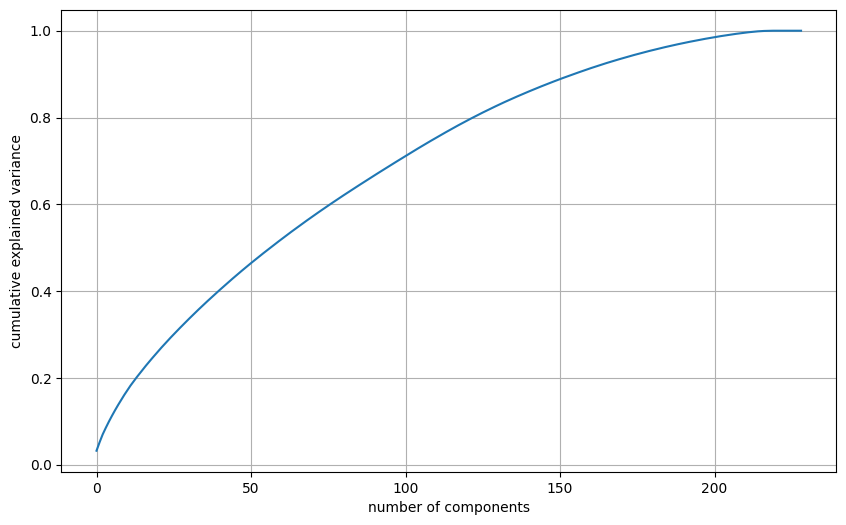

In [38]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

No tenemos un componente que destaque sobre los demás, por lo que no podemos reducir la información de gran forma, pero podemos descartar el mayor número posible

In [39]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1280, 179)

# Clustering

/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pablo.fernandez/Desktop/bootcamp/.venv/lib/python3.11/site-packages/skle

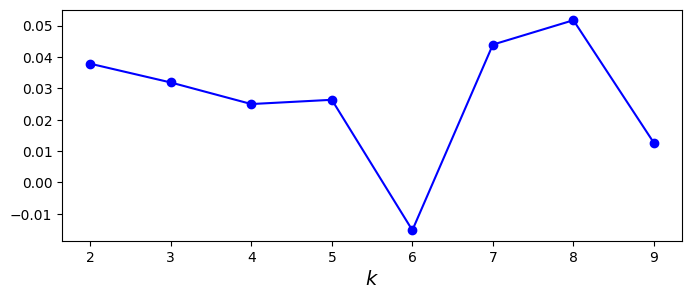

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_k = 10
kmeans_per_k = [KMeans(n_clusters=k, random_state=rn_state).fit(X_pca) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")

plt.xlabel("$k$", fontsize=14)

plt.show()

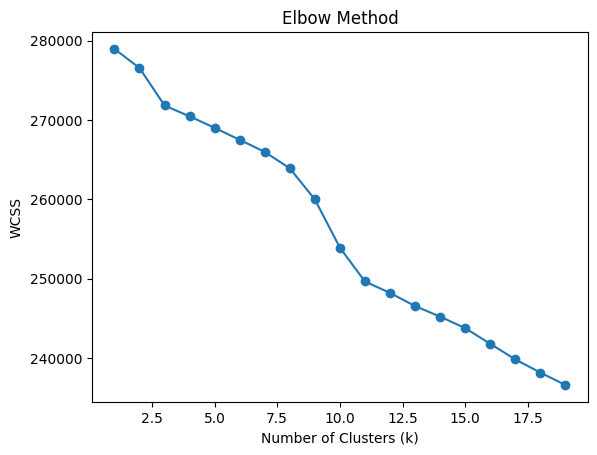

In [41]:
wcss = []
max_k = 20
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, max_k), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [42]:
np.diff(wcss)

array([-2405.91175513, -4723.03055049, -1372.36702358, -1444.4605006 ,
       -1511.07907801, -1523.06475199, -2074.38158029, -3913.5523711 ,
       -6086.77149372, -4260.23416458, -1442.76823097, -1653.05539181,
       -1335.15381179, -1445.01991901, -1976.74241112, -1966.25248094,
       -1661.60477862, -1557.66946549])

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)

print('clases únicas:', np.unique(dbscan.labels_))
print('cantidad de puntos core', len(dbscan.core_sample_indices_))
print('puntos de interes', dbscan.core_sample_indices_[:10])

clases únicas: [-1  0  1  2  3  4  5  6  7  8  9]
cantidad de puntos core 59
puntos de interes [13 15 18 26 27 29 53 56 60 92]


# LDA

In [44]:
df_wine_expanded['Price_range'] = pd.cut(df_wine_expanded['Price'], bins=3, labels=['low', 'medium', 'high'])
df_wine_expanded['Price_range'].value_counts()

Price_range
low       1256
medium      18
high         6
Name: count, dtype: int64

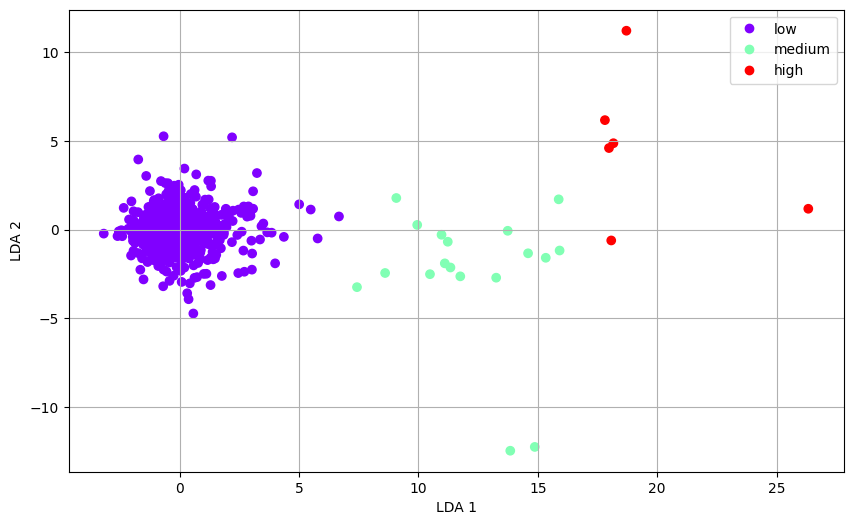

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y = df_wine_expanded['Price_range'].cat.codes
lda = LDA(n_components=np.unique(y).size -1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0], labels=['low', 'medium', 'high'])
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid()
plt.show()


In [46]:
df_wine_expanded['Price_range'] = pd.qcut(df_wine_expanded['Price'], q=3, labels=['low', 'medium', 'high'])
df_wine_expanded['Price_range'].value_counts()

Price_range
low       446
medium    431
high      403
Name: count, dtype: int64

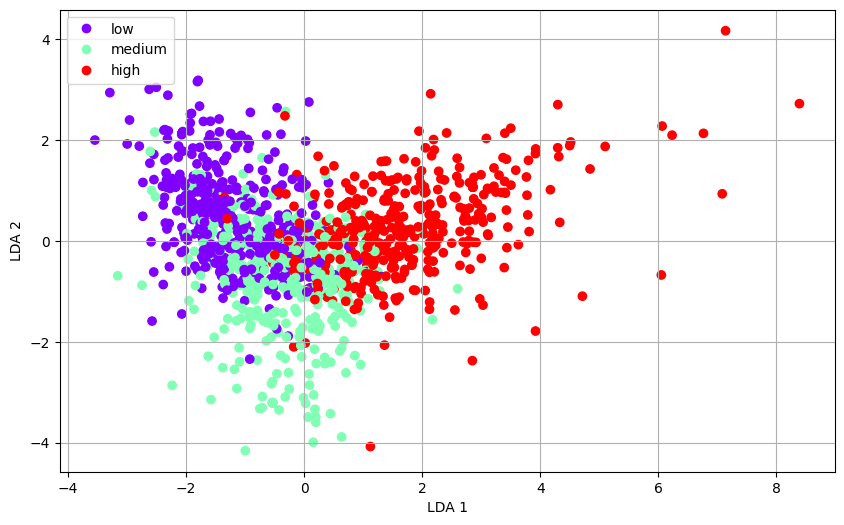

In [47]:
y = df_wine_expanded['Price_range'].cat.codes
lda = LDA(n_components=np.unique(y).size -1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0], labels=['low', 'medium', 'high'])
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid()
plt.show()


In [48]:
df_wine_expanded['Price_range'] = pd.qcut(df_wine_expanded['Price'], q=5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df_wine_expanded['Price_range'].value_counts()

Price_range
very low     304
very high    256
medium       244
low          238
high         238
Name: count, dtype: int64

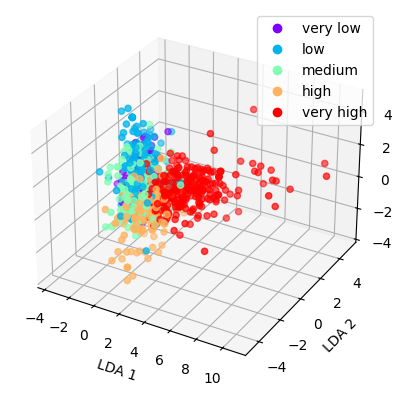

In [49]:
y = df_wine_expanded['Price_range'].cat.codes
lda = LDA(n_components=np.unique(y).size -1)
X_lda = lda.fit_transform(X_scaled, y)

ax = plt.figure().add_subplot(projection='3d')

scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap='rainbow')
ax.legend(handles=scatter.legend_elements()[0], labels=['very low', 'low', 'medium', 'high', 'very high'])
ax.set_xlabel('LDA 1')
ax.set_ylabel('LDA 2')
ax.set_zlabel('LDA 3')

plt.show()

# Conclusiones

Hemos visto un caso práctico de cómo plantear un trabajo de análisis de datos.

Hemos utilizado varias técnicas para poder trabajar con los datos y poder sacar conclusiones.

Hemos visto las utilidades de clusterización y de reducción de dimensiones.